<H1>DENGUE ANALYSIS</H1>
<hr>
<h1>John Paul R. Nieva</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
dengue = pd.read_csv('C:\\Users\\KRIANA\Downloads\\dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h1>Descriptive Analytics</h1>

In [4]:
dengue.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


In [5]:
dengue.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1020.0,2018.000000,1.414907,2016.0,2017.00,2018.0,2019.00,2020.0
Dengue_Cases,1020.0,1124.926471,1662.608878,10.0,247.75,582.5,1284.25,21658.0
Dengue_Deaths,1020.0,16.513725,96.358215,0.0,1.00,3.0,7.00,1651.0


<h1>Checking Null Values</h1>

In [6]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [7]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1>How did the number of dengue deaths vary by month from 2016 to 2020?</h1>

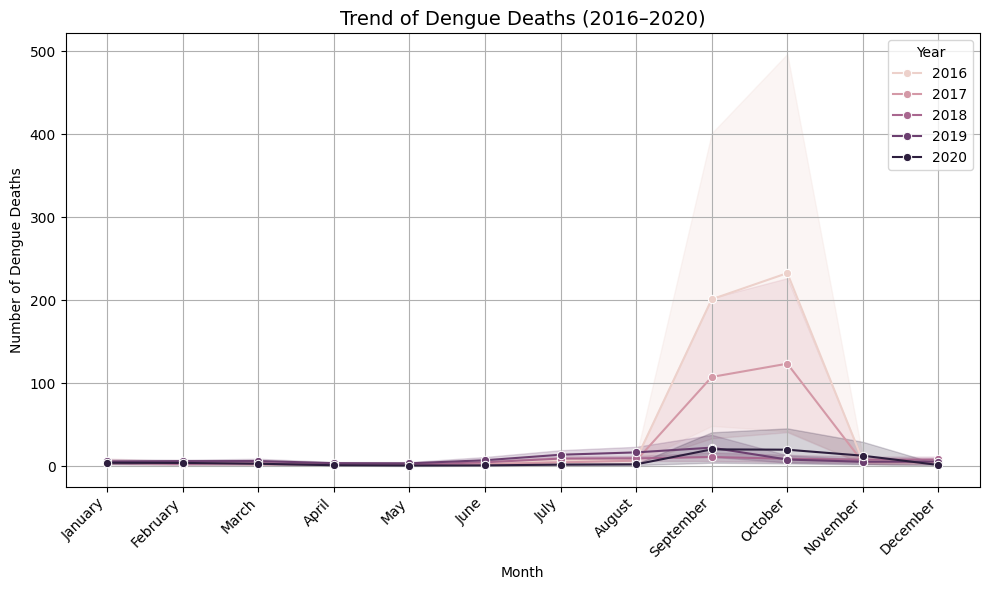

In [8]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.lineplot(data=dengue, x='Month', y='Dengue_Deaths', hue='Year', marker='o')

plt.title('Trend of Dengue Deaths (2016–2020)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Dengue Deaths')
plt.xticks(rotation=45, ha='right')

plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()


<h1>INSIGHT 1 : Dengue deaths usually increase sharply from June to September, reaching their peak around August, which shows that dengue cases are most severe during the rainy season.</h1>

<h1>INSIGHT 2 : Among the years compared, 2019 recorded the highest number of dengue deaths, especially in August, while 2020 showed the lowest trend, possibly due to improved health measures or reduced reporting during the pandemic.</h1>

<h1>INSIGHT 3 : From January to April, dengue deaths remain relatively low and stable, suggesting that early months of the year have fewer mosquito-borne infections before the rainy season begins.</h1>

<h1>Which regions recorded the highest number of dengue cases from 2016 to 2020?</h1>

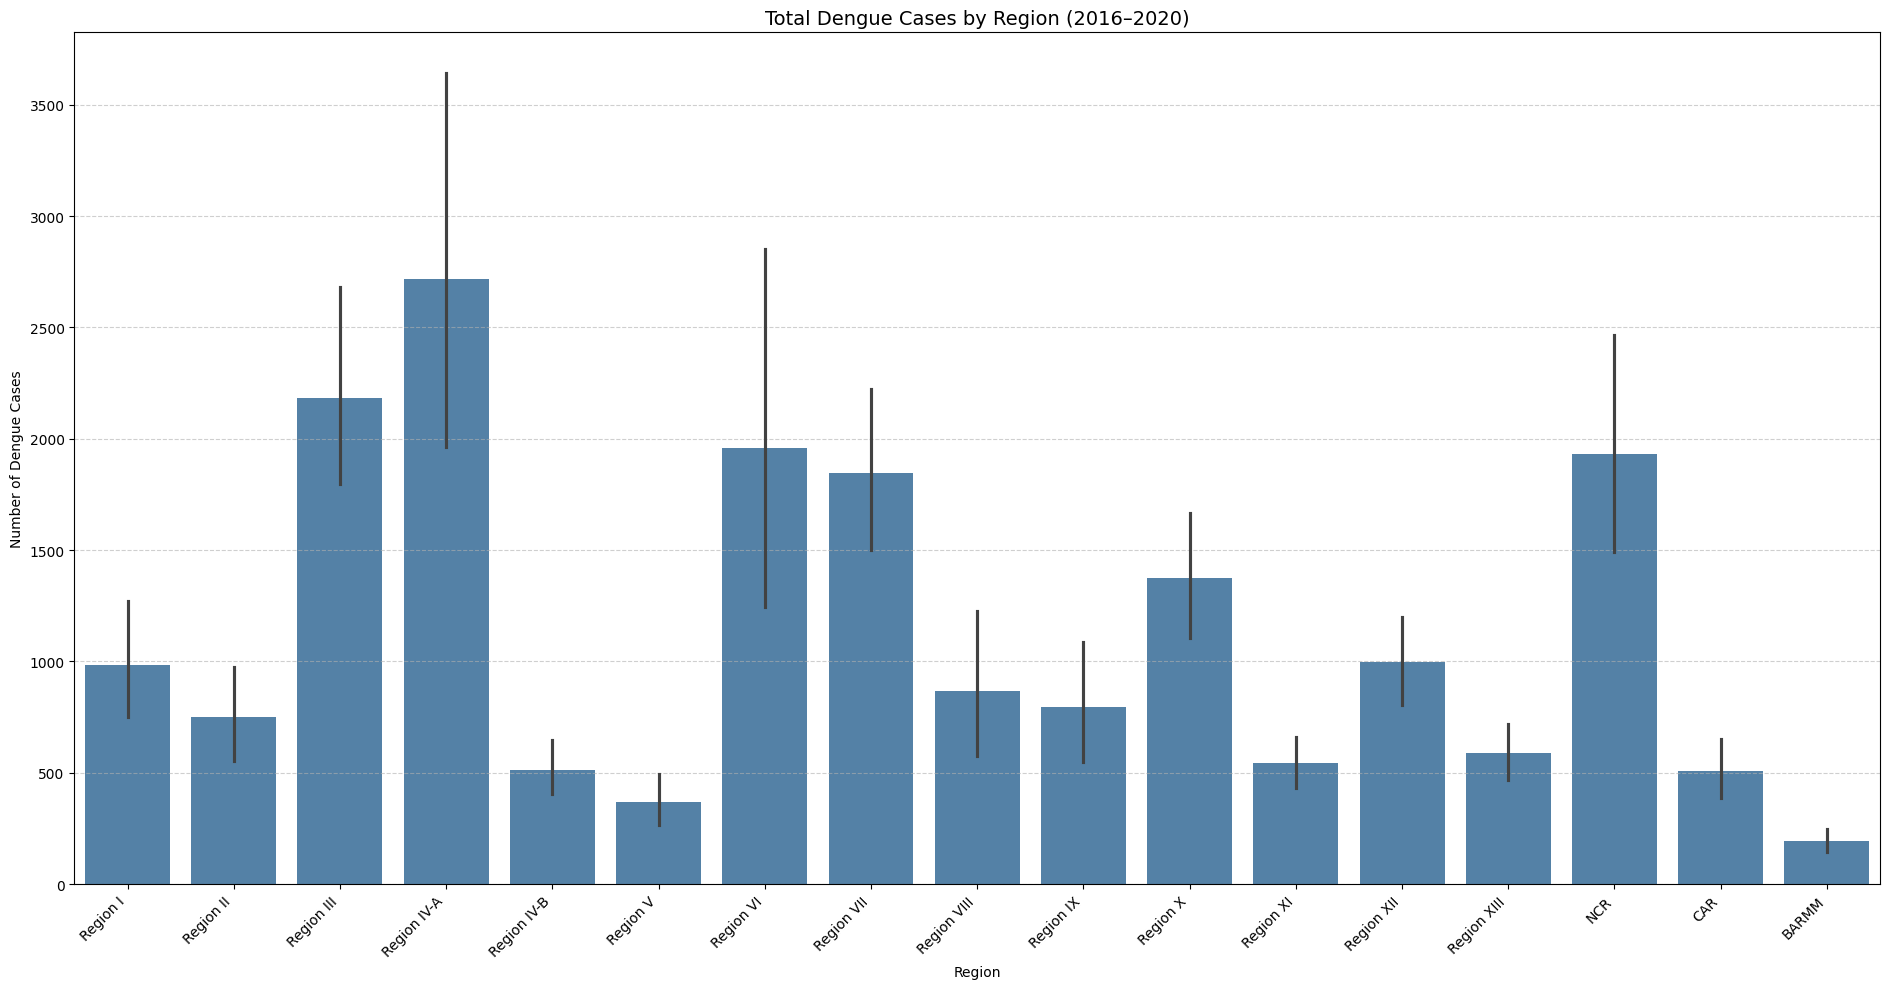

In [9]:
plt.figure(figsize=(19, 10))
sns.barplot(data=dengue, x='Region', y='Dengue_Cases', color='steelblue')

plt.title('Total Dengue Cases by Region (2016–2020)', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')

plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<h1>INSIGHT 4 : Region IV-A recorded the highest number of dengue cases from 2016 to 2020, showing it as one of the most affected areas in the country.</h1>

<h1>INSIGHT 5 : NCR and Region III also reported high case numbers, suggesting that densely populated regions are more prone to dengue outbreaks.</h1>

<h1>INSIGHT 6 : BARMM and Region V had the lowest dengue cases, possibly due to smaller populations, less urbanization, or effective mosquito control measures.</h1>

<h1>How did dengue cases change across regions over the years 2016 to 2020?</h1>

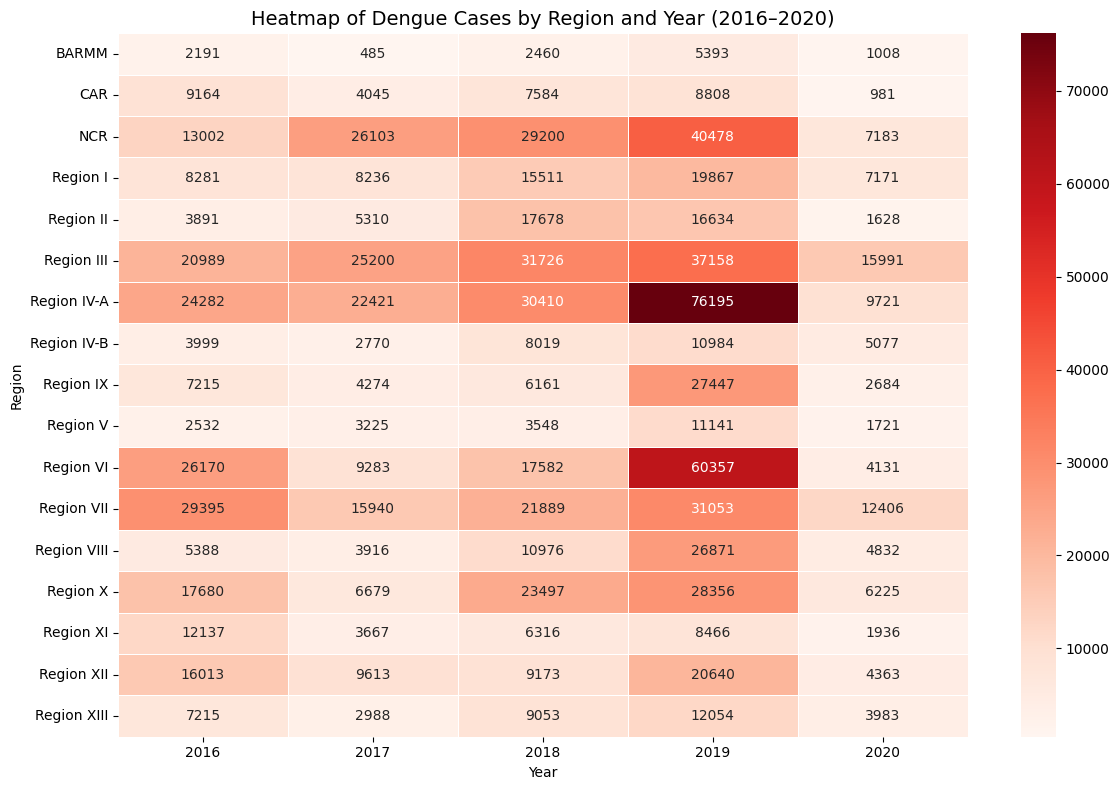

In [10]:
heatmap_data = dengue.pivot_table(values='Dengue_Cases',
                                  index='Region',
                                  columns='Year',
                                  aggfunc='sum')

plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5)

plt.title('Heatmap of Dengue Cases by Region and Year (2016–2020)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Region')

plt.tight_layout()
plt.show()


<h1>INSIGHT 7 : Some regions, such as Region IV-A and NCR, consistently show darker colors across the years, meaning they experienced higher dengue cases almost every year.</h1>

<h1>INSIGHT 8 : Regions like BARMM and CAR have lighter colors, indicating that they had fewer dengue cases and were less affected compared to other regions.</h1>

<h1>How did dengue cases change from 2018 to 2020 across different regions?</h1>

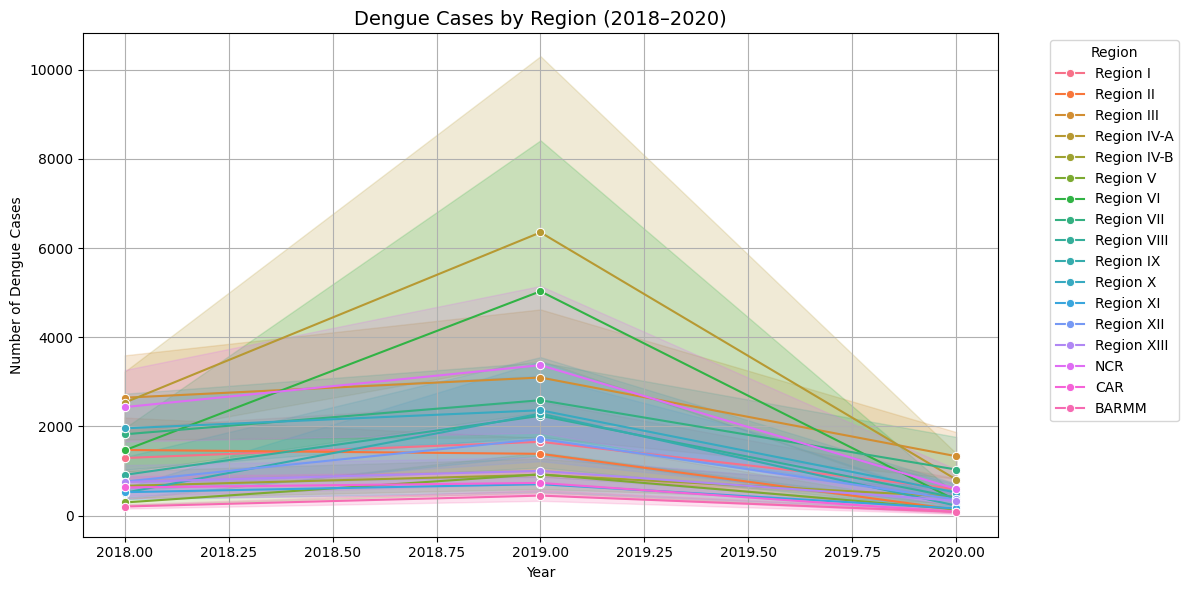

In [12]:
dengue_2018_2020 = dengue[dengue['Year'].between(2018, 2020)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=dengue_2018_2020, x='Year', y='Dengue_Cases', hue='Region', marker='o')

plt.title('Dengue Cases by Region (2018–2020)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Dengue Cases')

plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



<h1>INSIGHT 9 : There was a sharp increase in dengue cases in 2019 across most regions, making it the peak year for dengue outbreaks during the 3-year period.</h1>

<h1>INSIGHT 10 : In 2020, dengue cases significantly dropped in almost all regions, possibly due to pandemic restrictions that limited outdoor activities and reduced mosquito exposure.</h1>